In [83]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [129]:
class SLotMachine:
    def __init__(self,mu,sig,step,initialQ):
        self.realMean=mu;
        self.sig=sig
        self.augMean=initialQ;
        self.N=0;
        self.step=step;
    def pullHandle(self):
        return self.sig*np.random.randn()+self.realMean;
    def updateMean(self,x):
        self.N+=self.step;
        self.augMean=(self.augMean+((1/self.N)*(x-self.augMean)))
    def printGraphz(self):     
        points = 200000
        bins1 = 200
        y = self.sig*np.random.randn(points)+self.realMean;
        plt.hist(y, bins=bins1)
        plt.show()
        return y
    def getRewDist(self):
        points = 200000
        y = self.sig*np.random.randn(points)+self.realMean
        return y;
        

In [130]:
def generateSlotsMachines(N,stepSize,initialQ):   
    n=N;
    ticks=[]
    machinesz=[]
    machineszRewDist=[]
    step=stepSize;
    for i in range(n):
        ticks.append(i);
        r1 = random.randint(2, 9);
        va= random.randint(2, 3);
        m1=SLotMachine(r1,va,step,initialQ)
        machineszRewDist.append(m1.getRewDist());
        machinesz.append(m1);
    plt.violinplot(machineszRewDist,positions=ticks, showmeans=True, showextrema=True, showmedians=True)
    plt.show()
    return machinesz

In [131]:
def findMax(machinesz):
    max=-999;
    maxInd=0;
    for i in range(len(machinesz)):
        if machinesz[i].augMean>=max:
            max=machinesz[i].augMean;
            maxInd=i;
    
    return maxInd
            

In [137]:
def exp_esp_inc(N,stepSize,esp,initialQ,trials):
    machinesz=generateSlotsMachines(N,stepSize,initialQ);
    Rewards=[];
    Iter=[];
    data=np.empty(N)
    for i in range(trials):
        p=rd.random();
        if p<esp:
            k=np.random.choice(N);
        else:
            k=findMax(machinesz);
        
        rew=machinesz[k].pullHandle();
        machinesz[k].updateMean(rew);
        data[k]=rew;

    
    cum_avg=np.cumsum(data)/(np.arange(N)+1);
    plt.plot(cum_avg)
    plt.xscale('log')
    plt.show()
    for m in machinesz:
        print(m.augMean,m.realMean,m.realMean-m.augMean)    

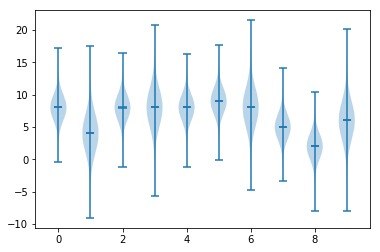

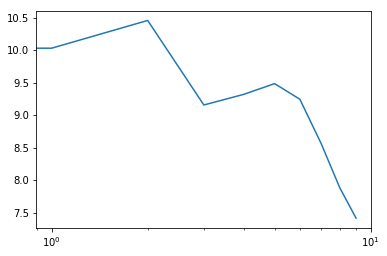

7.962935017818985 8 0.03706498218101473
3.9417465594307473 4 0.058253440569252746
8.00091598773278 8 -0.0009159877327800103
7.978497123929539 8 0.02150287607046142
7.961899730123809 8 0.03810026987619075
8.994029548222132 9 0.0059704517778680355
7.95473178477871 8 0.045268215221289765
5.001538128851211 5 -0.0015381288512106295
2.0030678817206438 2 -0.0030678817206437614
6.011630562165518 6 -0.011630562165517944


In [139]:
 exp_esp_inc(10,1,0.5,0,100000)